# Programming for Data Analysis Assignment

In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import scipy
from scipy.stats import norm
import math
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# https://www.pgatour.com/stats/detail/120
df = pd.read_csv('pgatour_2022-2023_actualaveragescore.csv')
df

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,0,46046,Scottie Scheffler,68.26,6007,88
1,2,0,46970,Jon Rahm,68.82,4886,71
2,3,0,35450,Patrick Cantlay,68.83,4956,72
3,4,0,46717,Viktor Hovland,68.92,6065,88
4,4,0,28237,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...,...,...
186,187,-3,51950,Max McGreevy,71.60,6444,90
187,188,-2,32662,Michael Gligic,71.72,5092,71
188,189,-2,29970,Dylan Frittelli,71.84,5460,76
189,190,-2,27095,Nick Watney,72.08,5334,74


In [3]:
df = df.drop('MOVEMENT',axis=1)

In [4]:
df = df.drop('PLAYER_ID',axis=1)

In [5]:
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS
0,1,Scottie Scheffler,68.26,6007,88
1,2,Jon Rahm,68.82,4886,71
2,3,Patrick Cantlay,68.83,4956,72
3,4,Viktor Hovland,68.92,6065,88
4,4,Rory McIlroy,68.92,4411,64
...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90
187,188,Michael Gligic,71.72,5092,71
188,189,Dylan Frittelli,71.84,5460,76
189,190,Nick Watney,72.08,5334,74


In [6]:
df["TOUR"] = "PGA TOUR"
df

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007,88,PGA TOUR
1,2,Jon Rahm,68.82,4886,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411,64,PGA TOUR
...,...,...,...,...,...,...
186,187,Max McGreevy,71.60,6444,90,PGA TOUR
187,188,Michael Gligic,71.72,5092,71,PGA TOUR
188,189,Dylan Frittelli,71.84,5460,76,PGA TOUR
189,190,Nick Watney,72.08,5334,74,PGA TOUR


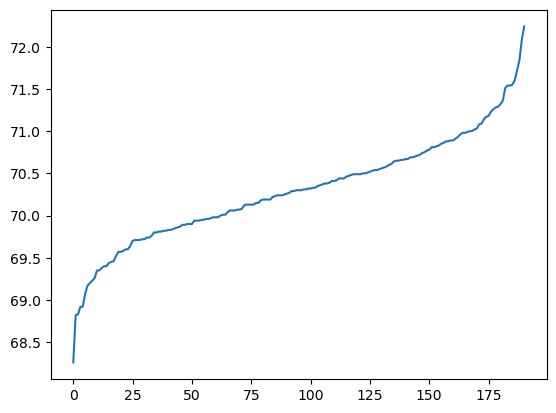

In [7]:
x = df.RANK
y = df.AVG
plt.plot(df.AVG)
plt.show()

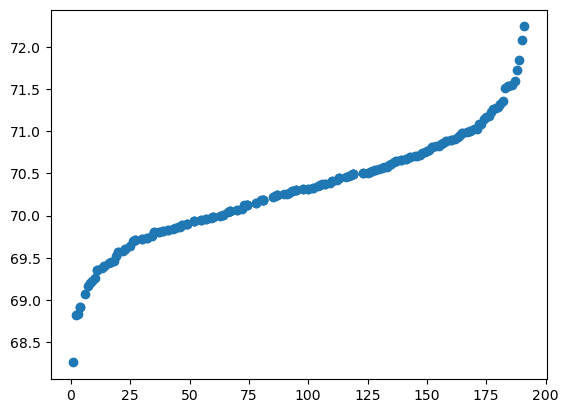

In [8]:
plt.scatter(x,y)
plt.show()

In [9]:
x = np.array(x)
x

array([  1,   2,   3,   4,   4,   6,   7,   8,   9,  10,  11,  11,  13,
        14,  14,  16,  17,  18,  19,  20,  20,  22,  23,  23,  25,  26,
        27,  27,  27,  30,  30,  32,  32,  34,  35,  35,  37,  37,  39,
        39,  41,  41,  43,  44,  45,  46,  47,  47,  49,  49,  49,  52,
        52,  52,  55,  55,  57,  57,  59,  60,  60,  60,  63,  64,  64,
        66,  67,  67,  67,  70,  70,  72,  73,  74,  74,  74,  74,  78,
        78,  80,  81,  81,  81,  81,  85,  86,  87,  87,  87,  90,  91,
        92,  93,  93,  95,  95,  95,  98,  98, 100, 100, 102, 102, 104,
       105, 106, 107, 107, 109, 110, 110, 112, 113, 113, 113, 116, 117,
       118, 119, 119, 119, 119, 123, 123, 125, 126, 127, 128, 128, 130,
       131, 132, 133, 134, 135, 136, 137, 137, 139, 139, 141, 141, 143,
       143, 145, 146, 147, 148, 149, 150, 151, 152, 152, 154, 155, 156,
       157, 158, 158, 160, 160, 162, 163, 164, 165, 165, 167, 168, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [10]:
y = np.array(y)
y

array([68.26, 68.82, 68.83, 68.92, 68.92, 69.07, 69.17, 69.2 , 69.23,
       69.26, 69.35, 69.35, 69.38, 69.4 , 69.4 , 69.44, 69.45, 69.46,
       69.52, 69.57, 69.57, 69.58, 69.6 , 69.6 , 69.64, 69.7 , 69.71,
       69.71, 69.71, 69.72, 69.72, 69.74, 69.74, 69.76, 69.8 , 69.8 ,
       69.81, 69.81, 69.82, 69.82, 69.83, 69.83, 69.84, 69.85, 69.86,
       69.87, 69.89, 69.89, 69.9 , 69.9 , 69.9 , 69.94, 69.94, 69.94,
       69.95, 69.95, 69.96, 69.96, 69.97, 69.98, 69.98, 69.98, 70.  ,
       70.01, 70.01, 70.04, 70.06, 70.06, 70.06, 70.07, 70.07, 70.08,
       70.12, 70.13, 70.13, 70.13, 70.13, 70.15, 70.15, 70.18, 70.19,
       70.19, 70.19, 70.19, 70.22, 70.23, 70.24, 70.24, 70.24, 70.25,
       70.26, 70.27, 70.29, 70.29, 70.3 , 70.3 , 70.3 , 70.31, 70.31,
       70.32, 70.32, 70.33, 70.33, 70.35, 70.36, 70.37, 70.38, 70.38,
       70.39, 70.41, 70.41, 70.42, 70.44, 70.44, 70.44, 70.46, 70.47,
       70.48, 70.49, 70.49, 70.49, 70.49, 70.5 , 70.5 , 70.51, 70.52,
       70.53, 70.54,

In [11]:
from scipy import stats
dist = stats.norm
data = y
bounds = [(68, 73), (0, 191)]
res = stats.fit(dist, data, bounds)
res

  params: FitParams(loc=70.3032460649986, scale=0.6356947205282886)
 success: True
 message: 'Optimization terminated successfully.'

In [12]:
res.params

FitParams(loc=70.3032460649986, scale=0.6356947205282886)

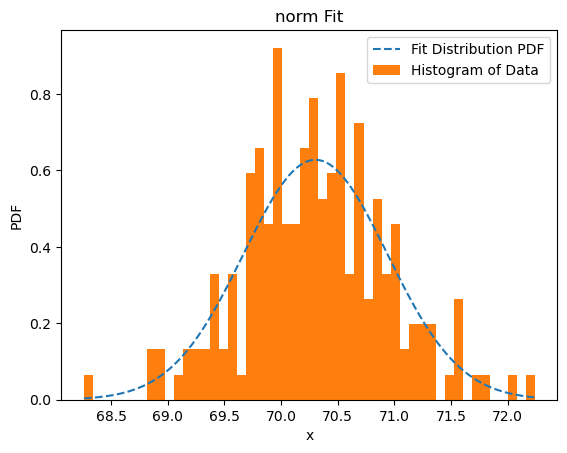

In [13]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


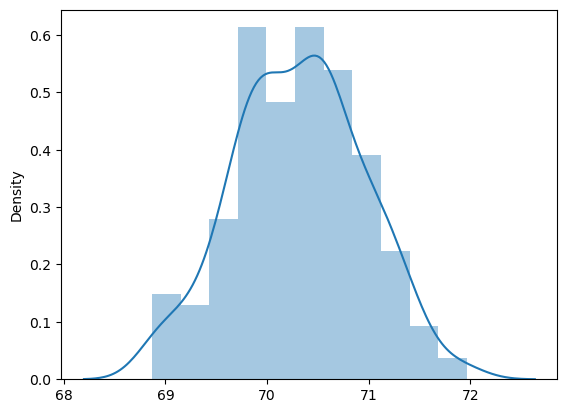

In [14]:
import seaborn as sns
from scipy.stats import norm

data = norm.rvs(70.30324607329841,0.6373654137997954,size=191) # you can use a pandas series or a list if you want

sns.distplot(data)
plt.show()

In [15]:
correlation = np.corrcoef(x, y)
correlation

array([[1.        , 0.96395719],
       [0.96395719, 1.        ]])

In [16]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [17]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [18]:
lr.predict([[5]])

array([[69.29801337]])

In [19]:
pred_y = lr.predict(x)
pred_y

array([[69.25363069],
       [69.26472636],
       [69.27582203],
       [69.2869177 ],
       [69.2869177 ],
       [69.30910904],
       [69.32020471],
       [69.33130037],
       [69.34239604],
       [69.35349171],
       [69.36458738],
       [69.36458738],
       [69.38677872],
       [69.39787438],
       [69.39787438],
       [69.42006572],
       [69.43116139],
       [69.44225706],
       [69.45335273],
       [69.4644484 ],
       [69.4644484 ],
       [69.48663973],
       [69.4977354 ],
       [69.4977354 ],
       [69.51992674],
       [69.53102241],
       [69.54211807],
       [69.54211807],
       [69.54211807],
       [69.57540508],
       [69.57540508],
       [69.59759642],
       [69.59759642],
       [69.61978775],
       [69.63088342],
       [69.63088342],
       [69.65307476],
       [69.65307476],
       [69.6752661 ],
       [69.6752661 ],
       [69.69745743],
       [69.69745743],
       [69.71964877],
       [69.73074444],
       [69.74184011],
       [69

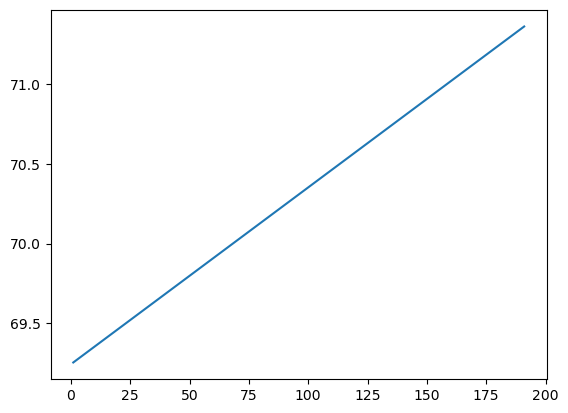

In [20]:
plt.plot(x,pred_y )
plt.show()

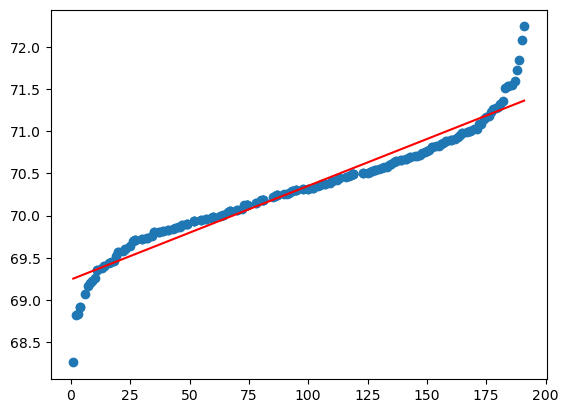

In [21]:
colour="red"
plt.scatter(x,y)
plt.plot(x,pred_y,colour )
plt.show()

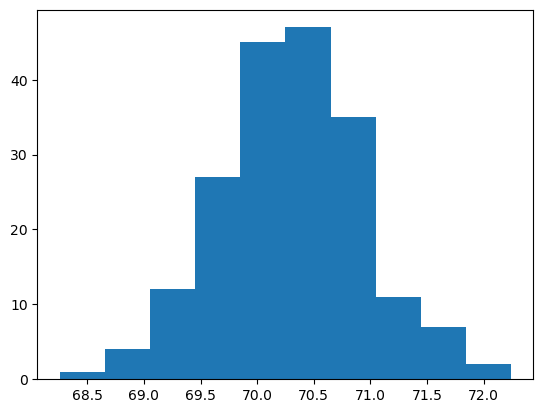

In [22]:
# Plot Average Score data from pgatour_golfstats_2022-2023_averagescore.csv
plt.hist(y, bins=10)
plt.show()

In [23]:
df.AVG

0      68.26
1      68.82
2      68.83
3      68.92
4      68.92
       ...  
186    71.60
187    71.72
188    71.84
189    72.08
190    72.24
Name: AVG, Length: 191, dtype: float64

In [24]:
std = df.AVG.std()
std

0.6373654137997954

In [25]:
mean = df.AVG.mean()
mean

70.30324607329841

In [26]:
df.describe()

,RANK,AVG,TOTAL STROKES,TOTAL ROUNDS
count,191.000000,191.000000,191.000000,191.000000
mean,95.596859,70.303246,6058.560209,86.225131
std,55.372326,0.637365,1134.245762,16.359018
min,1.000000,68.260000,3128.000000,44.000000
25%,48.000000,69.895000,5386.500000,76.000000
50%,95.000000,70.300000,6085.000000,87.000000
75%,143.000000,70.690000,6840.500000,97.000000
max,191.000000,72.240000,8450.000000,122.000000


In [27]:
count = df.count()
count

RANK             191
PLAYER           191
AVG              191
TOTAL STROKES    191
TOTAL ROUNDS     191
TOUR             191
dtype: int64

In [28]:
# Synthesize a random normal distribution for Average Score
# I choose mu of 70.96 because this is the average score in pgatour_golfstats_2022-2023_averagescore.csv
y = np.random.normal(mean,std,191)
y

array([70.85188817, 71.76249136, 70.70481738, 69.45158693, 69.56972191,
       69.59956181, 71.00319425, 70.24977356, 70.49895085, 69.67122718,
       69.4848238 , 70.57658635, 70.5621712 , 69.92493366, 69.53887002,
       69.84454362, 69.31258624, 70.6767736 , 69.38215202, 70.95383303,
       70.55378204, 70.37572387, 70.54108387, 70.74729833, 69.36270246,
       70.02270771, 69.69679686, 70.23509499, 69.66574842, 69.50105268,
       71.24145713, 69.42670117, 69.33981743, 70.09960219, 70.71086837,
       71.53043057, 70.81140424, 69.79216481, 70.46223357, 70.2145373 ,
       70.18165416, 69.53033982, 70.92037679, 70.81753663, 70.43001543,
       70.29103654, 69.2832488 , 70.24677776, 70.70404341, 69.88847509,
       70.59337384, 70.55135642, 70.54766897, 70.98292345, 69.60716758,
       70.43952844, 70.46087063, 71.87594656, 70.72698148, 70.66483484,
       70.91419377, 70.5088548 , 70.29479612, 70.54826391, 70.37319436,
       70.17642568, 70.23603207, 71.05141963, 70.56417034, 71.15

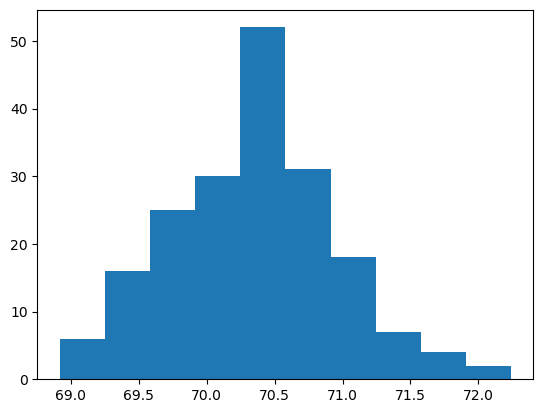

In [29]:
# Plot random normal distribution for Average Score
plt.hist(y)
plt.show()

In [30]:
from scipy import stats
dist = stats.norm
data = y
res = stats.fit(dist, data,bounds=[(69,73), (0, 50)])
res

  params: FitParams(loc=70.35642036753636, scale=0.6093945465268767)
 success: True
 message: 'Optimization terminated successfully.'

In [31]:
res.params

FitParams(loc=70.35642036753636, scale=0.6093945465268767)

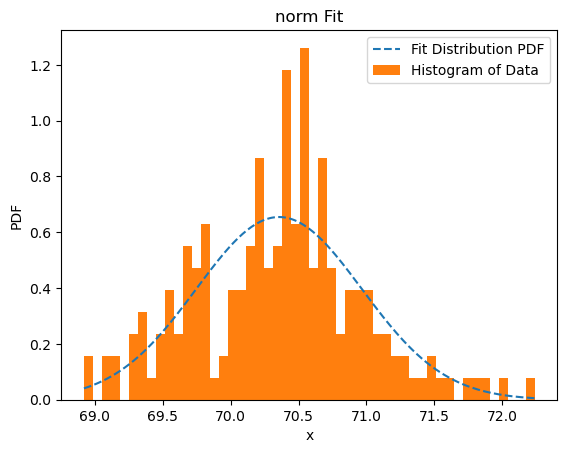

In [32]:
res.plot()
plt.show()

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


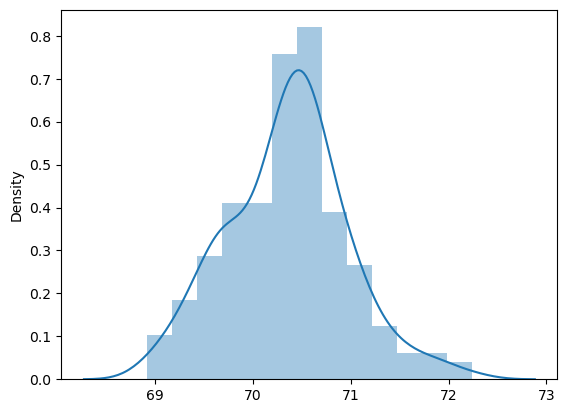

In [33]:
data = y

sns.distplot(data)
plt.show()

In [34]:
#ks.test(df, "pnorm", mean=mean, sd=std)

In [35]:
#fitdist(y, "norm")

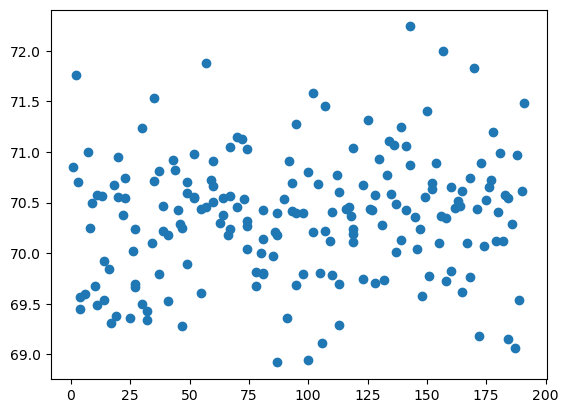

In [36]:
x = df.RANK
plt.scatter(x,y)
plt.show()

In [37]:
correlation = np.corrcoef(x, y)
correlation

array([[1.        , 0.11792791],
       [0.11792791, 1.        ]])

In [38]:
x = np.array(x)
x

array([  1,   2,   3,   4,   4,   6,   7,   8,   9,  10,  11,  11,  13,
        14,  14,  16,  17,  18,  19,  20,  20,  22,  23,  23,  25,  26,
        27,  27,  27,  30,  30,  32,  32,  34,  35,  35,  37,  37,  39,
        39,  41,  41,  43,  44,  45,  46,  47,  47,  49,  49,  49,  52,
        52,  52,  55,  55,  57,  57,  59,  60,  60,  60,  63,  64,  64,
        66,  67,  67,  67,  70,  70,  72,  73,  74,  74,  74,  74,  78,
        78,  80,  81,  81,  81,  81,  85,  86,  87,  87,  87,  90,  91,
        92,  93,  93,  95,  95,  95,  98,  98, 100, 100, 102, 102, 104,
       105, 106, 107, 107, 109, 110, 110, 112, 113, 113, 113, 116, 117,
       118, 119, 119, 119, 119, 123, 123, 125, 126, 127, 128, 128, 130,
       131, 132, 133, 134, 135, 136, 137, 137, 139, 139, 141, 141, 143,
       143, 145, 146, 147, 148, 149, 150, 151, 152, 152, 154, 155, 156,
       157, 158, 158, 160, 160, 162, 163, 164, 165, 165, 167, 168, 168,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [39]:
y = np.array(y)
y

array([70.85188817, 71.76249136, 70.70481738, 69.45158693, 69.56972191,
       69.59956181, 71.00319425, 70.24977356, 70.49895085, 69.67122718,
       69.4848238 , 70.57658635, 70.5621712 , 69.92493366, 69.53887002,
       69.84454362, 69.31258624, 70.6767736 , 69.38215202, 70.95383303,
       70.55378204, 70.37572387, 70.54108387, 70.74729833, 69.36270246,
       70.02270771, 69.69679686, 70.23509499, 69.66574842, 69.50105268,
       71.24145713, 69.42670117, 69.33981743, 70.09960219, 70.71086837,
       71.53043057, 70.81140424, 69.79216481, 70.46223357, 70.2145373 ,
       70.18165416, 69.53033982, 70.92037679, 70.81753663, 70.43001543,
       70.29103654, 69.2832488 , 70.24677776, 70.70404341, 69.88847509,
       70.59337384, 70.55135642, 70.54766897, 70.98292345, 69.60716758,
       70.43952844, 70.46087063, 71.87594656, 70.72698148, 70.66483484,
       70.91419377, 70.5088548 , 70.29479612, 70.54826391, 70.37319436,
       70.17642568, 70.23603207, 71.05141963, 70.56417034, 71.15

In [40]:
x = x.reshape(-1,1)
y = y.reshape(-1,1)

In [41]:
lr = LinearRegression()
lr.fit(x,y)

LinearRegression()

In [42]:
pred_y = lr.predict(x)
pred_y

array([[70.23332613],
       [70.23462738],
       [70.23592864],
       [70.23722989],
       [70.23722989],
       [70.2398324 ],
       [70.24113366],
       [70.24243491],
       [70.24373617],
       [70.24503742],
       [70.24633868],
       [70.24633868],
       [70.24894118],
       [70.25024244],
       [70.25024244],
       [70.25284495],
       [70.2541462 ],
       [70.25544746],
       [70.25674871],
       [70.25804997],
       [70.25804997],
       [70.26065248],
       [70.26195373],
       [70.26195373],
       [70.26455624],
       [70.26585749],
       [70.26715875],
       [70.26715875],
       [70.26715875],
       [70.27106251],
       [70.27106251],
       [70.27366502],
       [70.27366502],
       [70.27626753],
       [70.27756879],
       [70.27756879],
       [70.2801713 ],
       [70.2801713 ],
       [70.28277381],
       [70.28277381],
       [70.28537631],
       [70.28537631],
       [70.28797882],
       [70.28928008],
       [70.29058133],
       [70

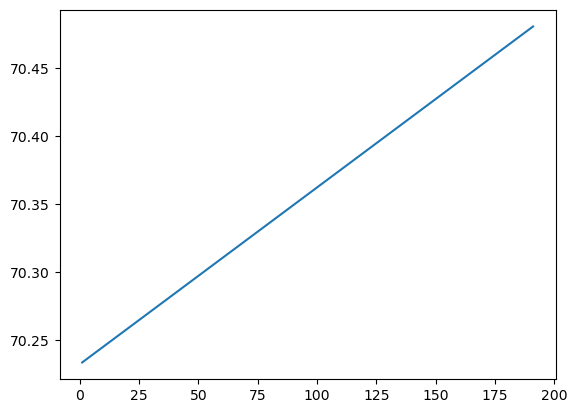

In [43]:
plt.plot(x,pred_y )
plt.show()

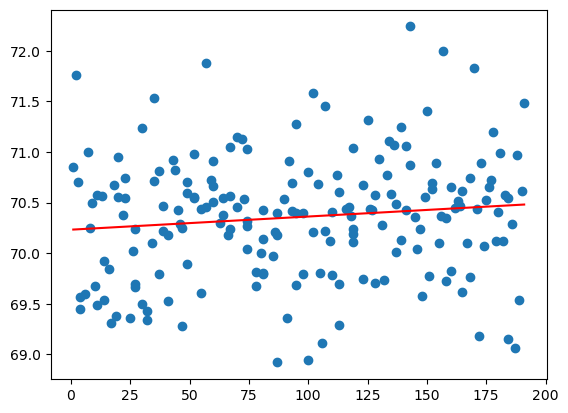

In [44]:
colour="red"
plt.scatter(x,y)
plt.plot(x,pred_y,colour )
plt.show()

In [45]:
# Synthesize a poisson distribution for Average Score
p = np.random.default_rng().poisson(mean, 191)
p

array([69, 65, 69, 59, 69, 79, 68, 64, 75, 67, 69, 72, 72, 69, 67, 75, 70,
       67, 68, 71, 76, 92, 59, 78, 65, 64, 76, 73, 65, 67, 63, 71, 52, 68,
       77, 60, 78, 75, 61, 81, 85, 81, 69, 69, 65, 70, 79, 84, 69, 61, 77,
       73, 82, 86, 66, 64, 73, 85, 72, 60, 66, 59, 71, 74, 68, 63, 73, 82,
       62, 53, 67, 71, 48, 83, 56, 74, 61, 62, 81, 78, 93, 86, 64, 49, 71,
       62, 77, 82, 63, 75, 80, 76, 78, 79, 71, 77, 76, 76, 83, 61, 79, 72,
       77, 86, 83, 72, 70, 77, 83, 65, 78, 60, 66, 92, 61, 78, 67, 68, 68,
       62, 68, 51, 61, 72, 79, 68, 78, 69, 70, 75, 78, 71, 59, 74, 75, 85,
       68, 66, 62, 65, 77, 77, 68, 87, 73, 59, 69, 73, 85, 68, 71, 71, 81,
       66, 61, 74, 59, 84, 69, 63, 79, 54, 60, 79, 66, 88, 68, 58, 76, 65,
       63, 74, 76, 65, 60, 80, 75, 71, 69, 83, 70, 65, 65, 72, 67, 80, 75,
       73, 55, 69, 58], dtype=int64)

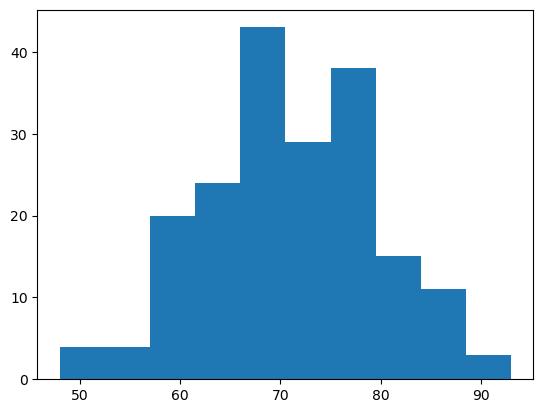

In [46]:
# Plot poisson distribution for Average Score
plt.hist(p)
plt.show()

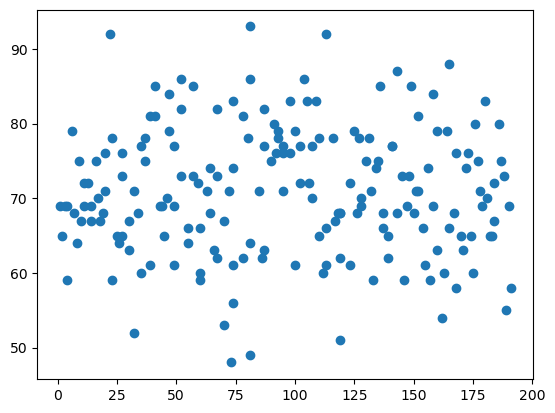

In [47]:
plt.scatter(x,p)
plt.show()

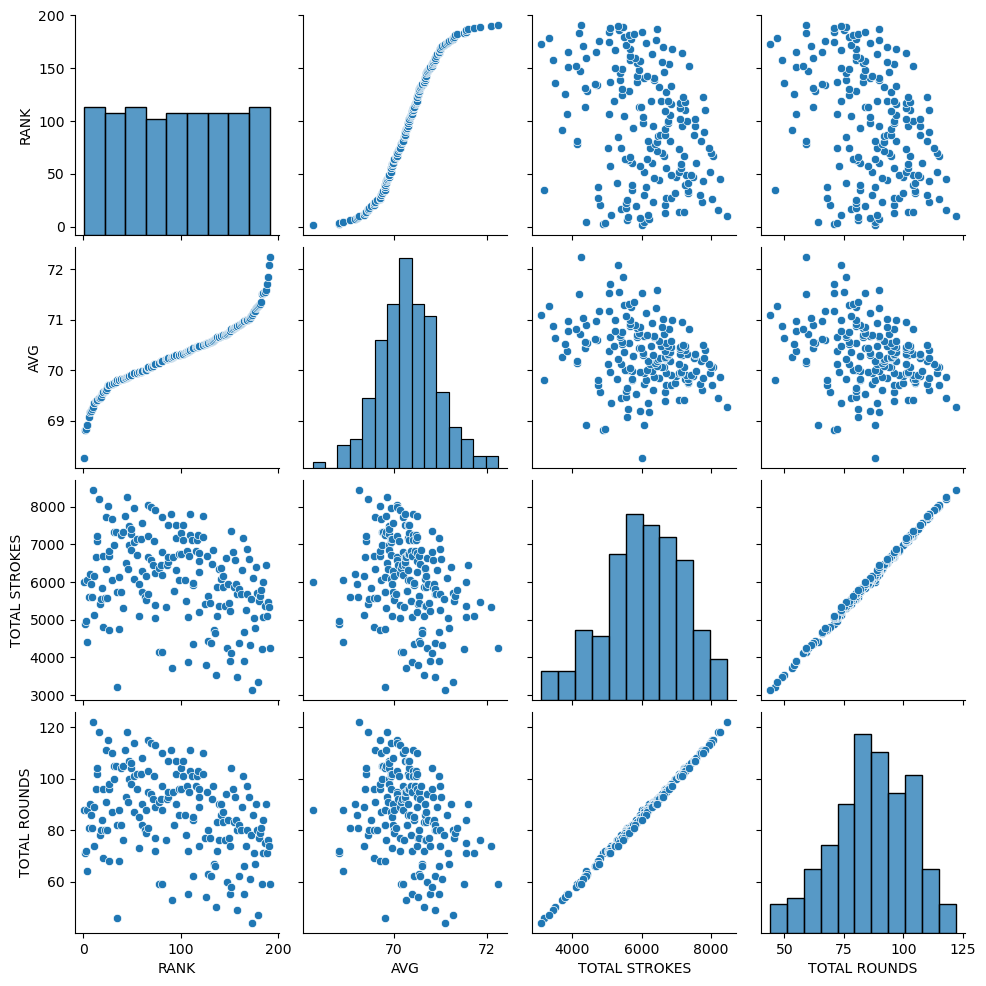

In [48]:
sns.pairplot(data=df)

In [49]:
#correlation = np.corrcoef(x, p)
#correlation

In [50]:
# https://www.pgatour.com/stats/detail/101
df1 = pd.read_csv('pgatour_golfstats_2022-2023_driving.csv')
df1

,RANK,MOVEMENT,PLAYER_ID,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES
0,1,0,28237,Rory McIlroy,326.3,41771,128
1,2,0,51491,Brandon Matthews,321.3,37915,118
2,3,0,52372,Cameron Champ,318.8,47180,148
3,4,0,52453,Nicolai Hojgaard,317.7,29227,92
4,5,0,57366,Cameron Young,316.5,51902,164
...,...,...,...,...,...,...,...
184,185,-2,30927,Brendon Todd,282.8,54300,192
185,186,-2,40058,Zac Blair,282.4,42920,152
186,187,-2,31202,William McGirt,281.0,25292,90
187,188,-2,34409,David Lingmerth,279.2,45789,164


In [51]:
df1 = df1.drop('MOVEMENT', axis=1)
df1 = df1.drop('PLAYER_ID', axis=1)

In [52]:
df1["TOUR"] = "PGA TOUR"
df1

,RANK,PLAYER,AVG,TOTAL DISTANCE,TOTAL DRIVES,TOUR
0,1,Rory McIlroy,326.3,41771,128,PGA TOUR
1,2,Brandon Matthews,321.3,37915,118,PGA TOUR
2,3,Cameron Champ,318.8,47180,148,PGA TOUR
3,4,Nicolai Hojgaard,317.7,29227,92,PGA TOUR
4,5,Cameron Young,316.5,51902,164,PGA TOUR
...,...,...,...,...,...,...
184,185,Brendon Todd,282.8,54300,192,PGA TOUR
185,186,Zac Blair,282.4,42920,152,PGA TOUR
186,187,William McGirt,281.0,25292,90,PGA TOUR
187,188,David Lingmerth,279.2,45789,164,PGA TOUR


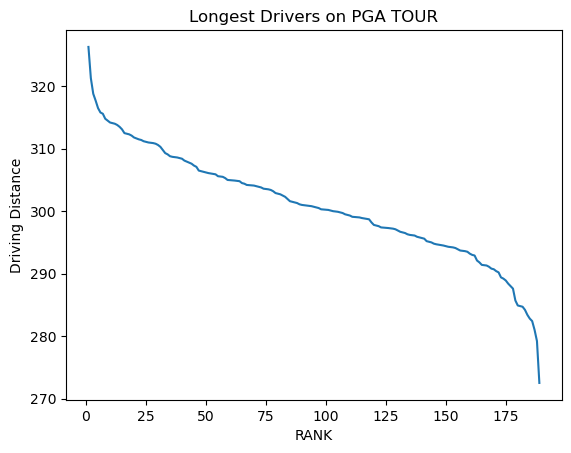

In [53]:
x = df1.RANK
y = df1.AVG
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.plot(x,y) 
  
# Set title 
ax.set_title("Longest Drivers on PGA TOUR") 
  
# adding labels 
ax.set_xlabel('RANK') 
ax.set_ylabel('Driving Distance') 

plt.show()

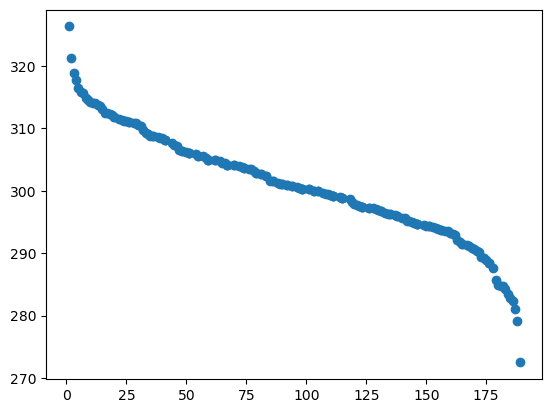

In [54]:
plt.scatter(x,y)
plt.show()

In [55]:
correlation = np.corrcoef(x, y)
correlation

array([[ 1.        , -0.97161469],
       [-0.97161469,  1.        ]])

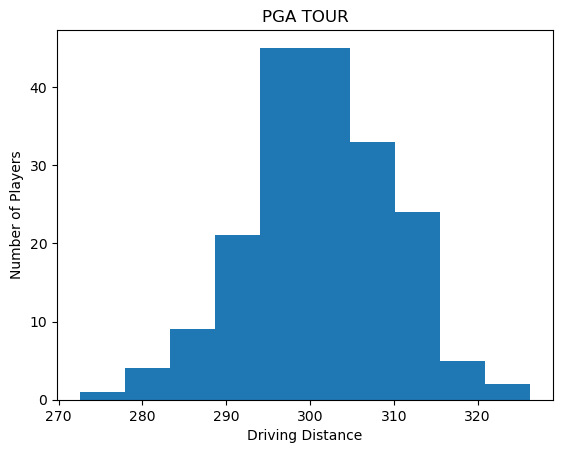

In [56]:
# Plot Driving Distance data from pgatour_golfstats_2022-2023_driving.csv
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(y) 
  
# Set title 
ax.set_title("PGA TOUR") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

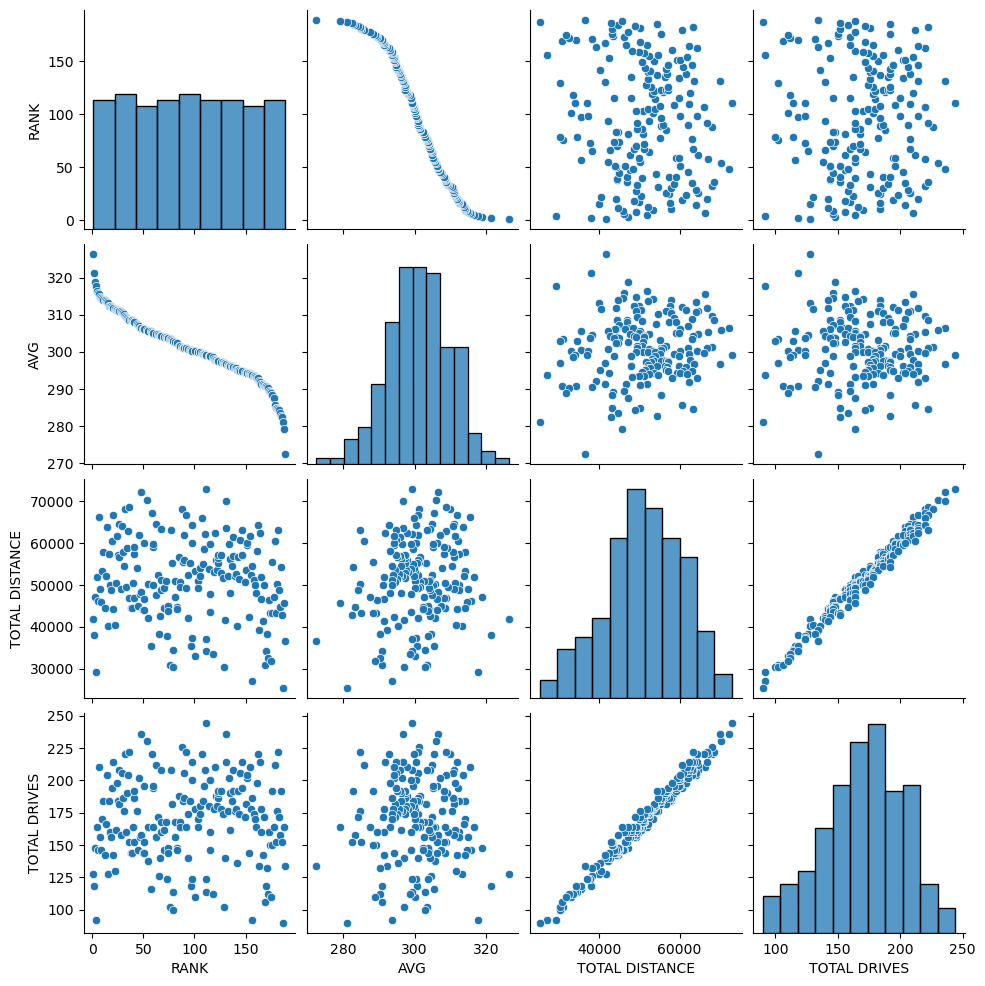

In [57]:
sns.pairplot(data=df1)

In [58]:
df1.AVG

0      326.3
1      321.3
2      318.8
3      317.7
4      316.5
       ...  
184    282.8
185    282.4
186    281.0
187    279.2
188    272.5
Name: AVG, Length: 189, dtype: float64

In [59]:
std = df1.AVG.std()
std

8.66203975287581

In [60]:
mean = df1.AVG.mean()
mean

300.96402116402106

In [61]:
df1.describe()

,RANK,AVG,TOTAL DISTANCE,TOTAL DRIVES
count,189.000000,189.000000,189.000000,189.00000
mean,94.719577,300.964021,51175.285714,170.05291
std,54.711144,8.662040,9840.011169,32.48334
min,1.000000,272.500000,25292.000000,90.00000
25%,48.000000,295.200000,44589.000000,148.00000
50%,94.000000,300.800000,51338.000000,172.00000
75%,142.000000,306.400000,57791.000000,192.00000
max,189.000000,326.300000,72978.000000,244.00000


In [62]:
count = df1.count()
count

RANK              189
PLAYER            189
AVG               189
TOTAL DISTANCE    189
TOTAL DRIVES      189
TOUR              189
dtype: int64

In [63]:
# Synthesize a random normal distribution for Driving Distance
# I choose mu of 300.5 because this is the average drivage distance in pgatour_golfstats_2022-2023_driving.csv
mu, sigma = 300.96, 8.66 # mean and standard deviation
s = np.random.default_rng().normal(mu, sigma, 189)
s

array([310.1694996 , 318.63326782, 280.28457007, 309.83716959,
       307.32013805, 307.28670782, 317.83537458, 296.74796585,
       294.66460749, 303.1606471 , 305.88203781, 310.18539648,
       283.70166646, 316.54226815, 288.48154572, 308.55842632,
       292.06183741, 298.3313578 , 307.67542319, 320.38781611,
       309.05304592, 296.90158175, 311.52864019, 294.85548648,
       311.76534171, 306.47250754, 297.1028557 , 302.22950426,
       294.5836276 , 301.68015758, 306.22252121, 304.1223759 ,
       294.82461096, 291.36592339, 286.36497754, 279.09452438,
       304.19429294, 305.48334066, 314.01472368, 298.47200549,
       300.11877621, 301.42281598, 304.86948655, 300.48171479,
       298.04543533, 285.14754259, 296.67166536, 311.07646835,
       300.08407177, 289.41477973, 305.8040404 , 293.72928885,
       285.50211094, 294.48369268, 297.32344041, 290.26961742,
       314.54811907, 292.8927242 , 287.67871069, 303.13616713,
       282.08468748, 288.28533592, 309.09183067, 295.49

In [64]:
x, counts = np.unique(s, return_counts=True)
x


array([277.30557961, 278.63612135, 279.09452438, 280.28457007,
       280.74785132, 280.80054801, 282.08468748, 283.68870952,
       283.70166646, 285.14754259, 285.50211094, 286.36497754,
       286.56796125, 286.96686489, 287.67871069, 287.85707237,
       288.13549157, 288.28533592, 288.48154572, 288.69755134,
       288.75810828, 289.12294336, 289.15382861, 289.41477973,
       289.50178289, 290.26961742, 290.27113114, 290.50235731,
       290.92102714, 291.22752964, 291.36592339, 291.98515164,
       292.06183741, 292.13782202, 292.37070595, 292.8927242 ,
       292.91951478, 293.42054491, 293.72928885, 293.76104625,
       294.04275605, 294.1013181 , 294.21658218, 294.384597  ,
       294.48369268, 294.5836276 , 294.66460749, 294.81396303,
       294.82461096, 294.85548648, 295.05517956, 295.07986783,
       295.4900704 , 296.06349567, 296.11951293, 296.20631375,
       296.34253141, 296.62859771, 296.63659265, 296.67166536,
       296.74796585, 296.90158175, 297.03842701, 297.10

In [65]:
counts

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

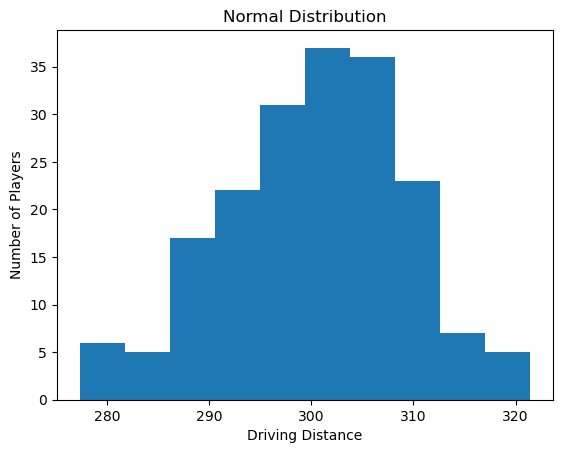

In [66]:
# Plot random normal distribution for Driving Distance
# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(s) 
  
# Set title 
ax.set_title("Normal Distribution") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

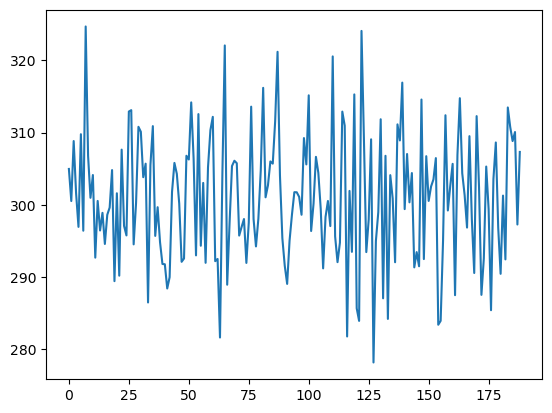

In [67]:
plt.plot(np.random.default_rng().normal(mu, sigma, 189))
plt.show()

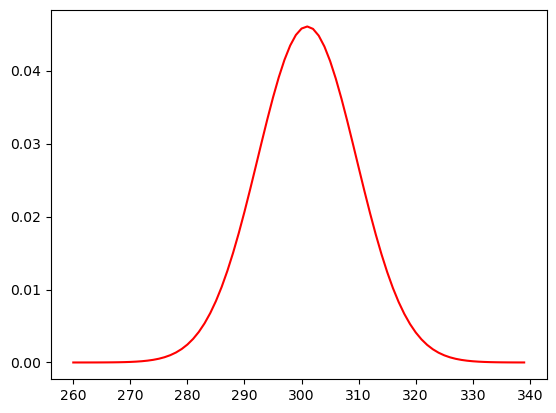

In [68]:
colour="red"
# Plot between -10 and 10 with .001 steps.
x_axis = np.arange(260, 340, 1)
# Mean = 0, SD = 2.
plt.plot(x_axis, norm.pdf(x_axis,300.96402116402106,8.66203975287581),colour)
plt.show()

In [69]:
#def my_gauss(x, sigma=sigma, h=h, mean=mean):
#    from math import exp, pow
#    variance = pow(sigma, 2)
#    return h * exp(-pow(x-mean, 2)/(2*variance))

In [70]:
#h = 40
#mean = mean
#variance = pow(sigma, 2)
#sigma = math.sqrt(variance)
#x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1)
#plt.plot(x, scipy.stats.norm.pdf(x, mu, sigma))
#plt.show()
#my_gauss

C:\Users\Fujitsu\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Count'>

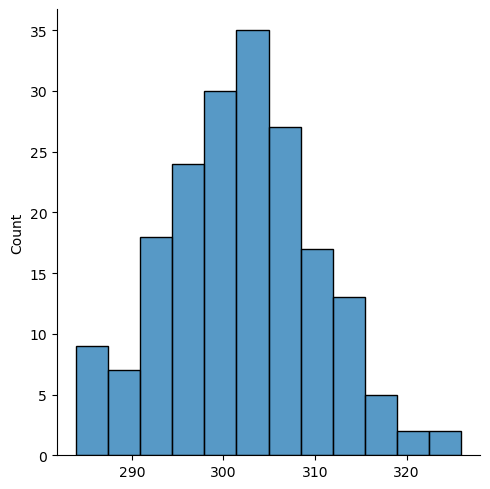

In [71]:
value = np.random.normal(loc=300.96402116402106,scale=8.66203975287581,size=189)
sns.displot(value)
sns.lineplot(value)

In [72]:
# Synthesize a poisson distribution for Driving Distance
mu=300.96402116402106
p = np.random.default_rng().poisson(mu, len(df1.index))
p

array([288, 293, 289, 291, 328, 318, 321, 283, 341, 316, 280, 290, 279,
       283, 311, 312, 315, 310, 287, 312, 305, 315, 303, 313, 340, 328,
       346, 286, 301, 288, 288, 302, 307, 298, 327, 272, 294, 310, 267,
       295, 308, 304, 301, 302, 294, 324, 332, 283, 327, 342, 289, 313,
       283, 298, 324, 274, 306, 282, 306, 261, 287, 296, 320, 299, 275,
       299, 290, 311, 325, 286, 324, 305, 291, 301, 289, 286, 267, 313,
       287, 294, 310, 292, 307, 286, 276, 314, 284, 310, 287, 286, 279,
       316, 313, 276, 324, 283, 298, 294, 317, 275, 314, 296, 269, 321,
       298, 294, 277, 311, 288, 327, 313, 301, 267, 288, 270, 307, 276,
       295, 292, 311, 288, 350, 276, 296, 318, 307, 297, 301, 322, 306,
       310, 299, 300, 297, 330, 313, 301, 310, 277, 303, 307, 320, 295,
       296, 295, 333, 295, 303, 297, 303, 327, 293, 277, 304, 291, 285,
       323, 314, 307, 275, 280, 312, 283, 323, 298, 308, 286, 313, 279,
       307, 296, 314, 313, 325, 319, 307, 313, 295, 296, 316, 29

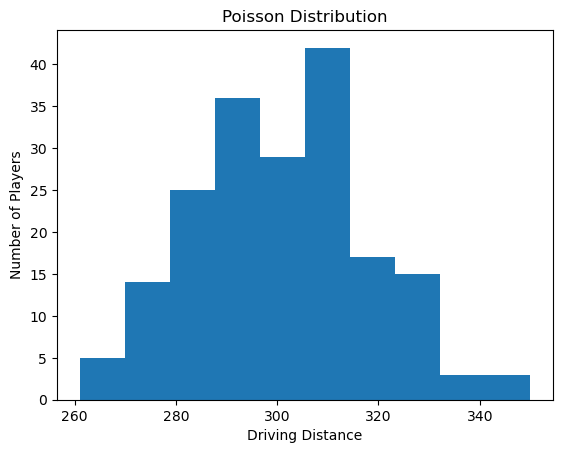

In [73]:
# Plot poisson distribution for Driving Distance

# Creating histogram 
fig, ax = plt.subplots(1, 1) 
ax.hist(p) 
  
# Set title 
ax.set_title("Poisson Distribution") 
  
# adding labels 
ax.set_xlabel('Driving Distance') 
ax.set_ylabel('Number of Players') 

plt.show()

In [74]:
dataframe1 = pd.read_excel('dpworldtour_2022-2023_scoringaverage.xlsx')
dataframe1

,RANK,COUNTRY,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,NaN,"MCILROY, Rory",30,68.80,DP World Tour
1,2,NaN,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,NaN,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,NaN,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,NaN,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...,...
169,170,NaN,"MURPHY, John",51,73.86,DP World Tour
170,171,NaN,"LI, Haotong",43,74.07,DP World Tour
171,172,NaN,"WINDRED, Blake",34,74.18,DP World Tour
172,173,NaN,"CHENGYAO, Ma",40,74.83,DP World Tour


In [75]:
dataframe1 = dataframe1.drop('COUNTRY',axis=1)

In [76]:
dataframe1

,RANK,PLAYER,TOTAL ROUNDS,AVG,TOUR
0,1,"MCILROY, Rory",30,68.80,DP World Tour
1,2,"BJÖRK, Alexander",88,69.53,DP World Tour
2,3,"HØJGAARD, Nicolai",61,69.59,DP World Tour
3,4,"KIMSEY, Nathan",76,69.74,DP World Tour
4,5,"OLESEN, Thorbjørn",84,69.80,DP World Tour
...,...,...,...,...,...
169,170,"MURPHY, John",51,73.86,DP World Tour
170,171,"LI, Haotong",43,74.07,DP World Tour
171,172,"WINDRED, Blake",34,74.18,DP World Tour
172,173,"CHENGYAO, Ma",40,74.83,DP World Tour


In [77]:
print(dataframe1.columns)

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')


In [78]:
#dataframe1.columns = ['RANK', 'Unnamed: 1', 'PLAYER', 'ROUNDS', 'AVG', 'TOUR']
dataframe1.columns

Index(['RANK', 'PLAYER', 'TOTAL ROUNDS', 'AVG', 'TOUR'], dtype='object')

In [79]:
dataframe1.iloc[0]

RANK                        1
PLAYER          MCILROY, Rory
TOTAL ROUNDS               30
AVG                      68.8
TOUR            DP World Tour
Name: 0, dtype: object

In [80]:
concat = pd.concat([df, dataframe1], ignore_index=True)
concat

,RANK,PLAYER,AVG,TOTAL STROKES,TOTAL ROUNDS,TOUR
0,1,Scottie Scheffler,68.26,6007.0,88,PGA TOUR
1,2,Jon Rahm,68.82,4886.0,71,PGA TOUR
2,3,Patrick Cantlay,68.83,4956.0,72,PGA TOUR
3,4,Viktor Hovland,68.92,6065.0,88,PGA TOUR
4,4,Rory McIlroy,68.92,4411.0,64,PGA TOUR
...,...,...,...,...,...,...
360,170,"MURPHY, John",73.86,NaN,51,DP World Tour
361,171,"LI, Haotong",74.07,NaN,43,DP World Tour
362,172,"WINDRED, Blake",74.18,NaN,34,DP World Tour
363,173,"CHENGYAO, Ma",74.83,NaN,40,DP World Tour


In [81]:
pgatour = concat[concat['TOUR']=='PGA TOUR']
dpworldtour = concat[concat['TOUR']=='DP World Tour']

In [82]:
pgatour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_5664\2823721802.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  pgatour.mean()


RANK               95.596859
AVG                70.303246
TOTAL STROKES    6058.560209
TOTAL ROUNDS       86.225131
dtype: float64

In [83]:
dpworldtour.mean()

C:\Users\Fujitsu\AppData\Local\Temp\ipykernel_5664\1499420383.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  dpworldtour.mean()


RANK             87.500000
AVG              71.273161
TOTAL STROKES          NaN
TOTAL ROUNDS     68.563218
dtype: float64

In [84]:
mean_groupby = concat.groupby(['TOUR']).AVG.mean()
mean_groupby

TOUR
DP World Tour    71.273161
PGA TOUR         70.303246
Name: AVG, dtype: float64

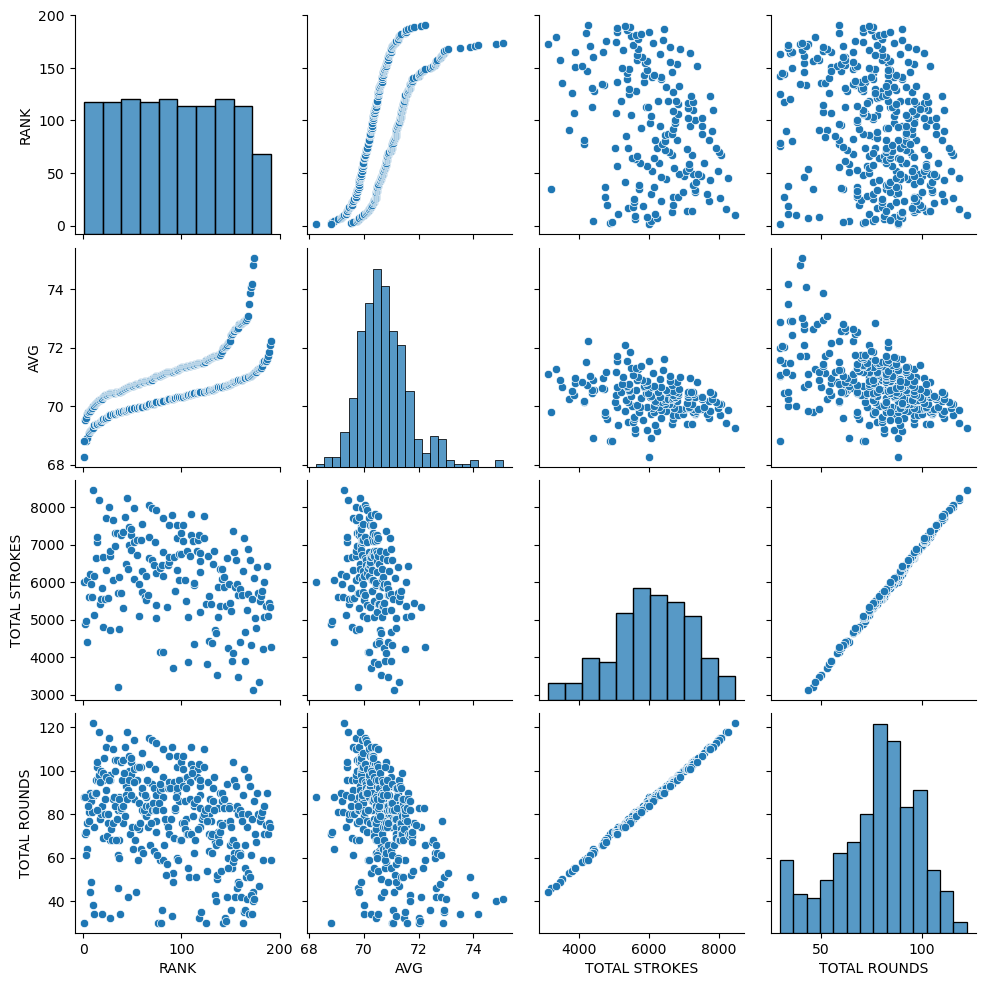

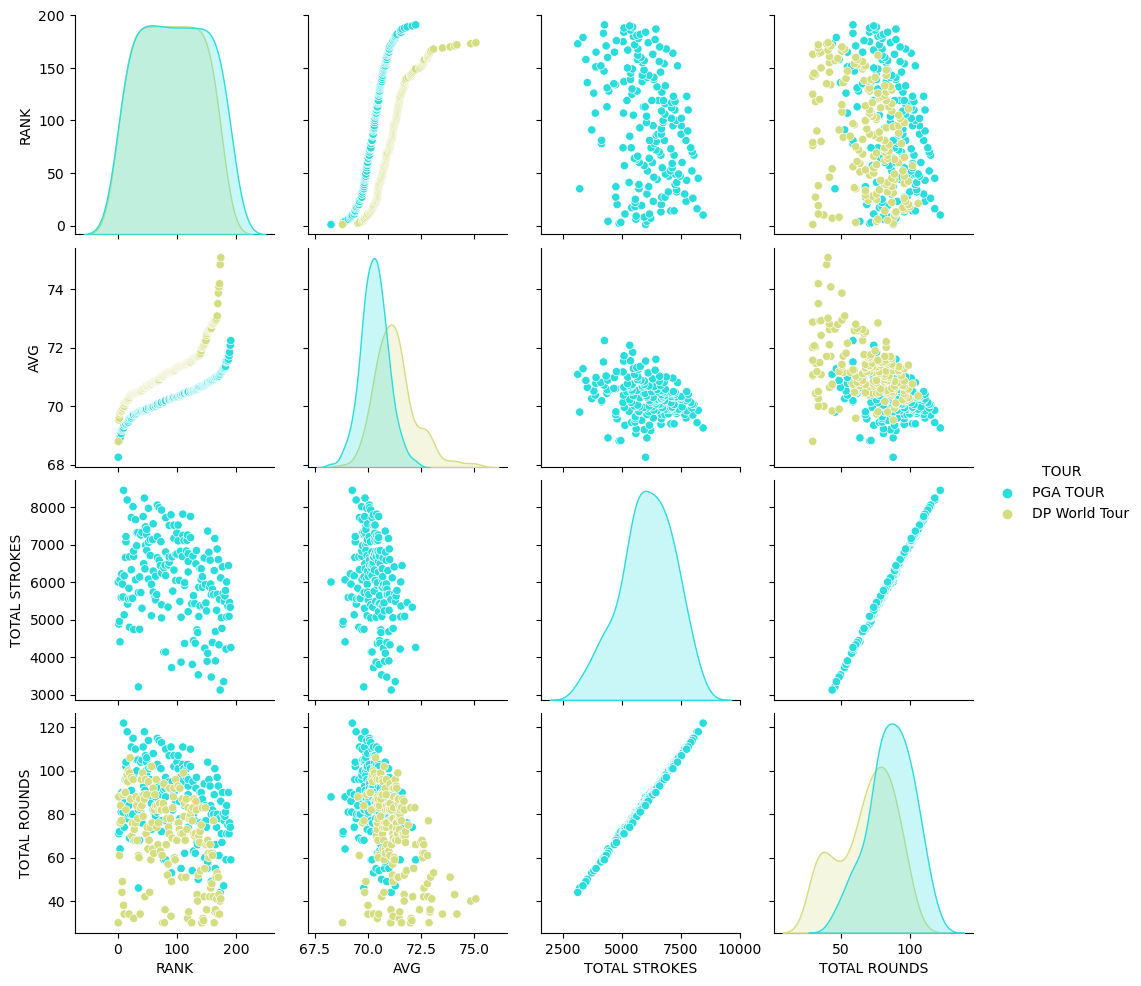

In [85]:
sns.pairplot(data = concat)
sns.pairplot(concat, hue="TOUR", palette="rainbow")

In [86]:
dataframe2 = pd.read_excel('Shane Lowry_2022-2-23_Results_time-series.xlsx')
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN


In [87]:
dataframe2['datetime'] = pd.to_datetime(dataframe2['DATE'])
dataframe2

,DATE,TOURNAMENT,POS,R1,R2,R3,R4,R5,TOTAL,TO PAR,RANK,PTS,Unnamed: 12,RANK.1,PTS.1,WINNINGS,Unnamed: 16,datetime
0,10.23.2022,THE CJ CUP in South Carolina,T23,68,67,71,72,-,278.0,-6,99,34.833,NaN,-,-,"$88,305.00",NaN,2022-10-23
1,12.4.2022,Hero World Challenge*,18,74,77,71,71,-,293.0,5,-,-,NaN,-,-,"$102,000.00",-,2022-12-04
2,2.12.2023,WM Phoenix Open,CUT,75,76,-,-,-,151.0,9,180,-,NaN,-,-,-,NaN,2023-02-12
3,2.19.2023,The Genesis Invitational,T14,69,69,71,68,-,277.0,-7,131,58.25,NaN,-,-,"$355,000.00",NaN,2023-02-19
4,2.26.2023,The Honda Classic,T5,68,68,65,70,-,271.0,-9,89,93,NaN,-,-,"$288,120.00",NaN,2023-02-26
5,3.5.2023,Arnold Palmer Invitational presented by Master...,67,72,70,80,71,-,293.0,5,97,4.08,NaN,-,-,"$42,600.00",NaN,2023-03-05
6,3.12.2023,THE PLAYERS Championship,T35,77,69,68,70,-,284.0,-4,96,19.267,NaN,-,-,"$114,166.67",NaN,2023-03-12
7,3.26.2023,World Golf Championships-Dell Technologies Mat...,T31,-,-,-,-,-,0.0,NaN,97,17.729,NaN,-,-,"$113,761.91",NaN,2023-03-26
8,4.9.2023,Masters Tournament,T16,68,72,73,73,-,286.0,-2,88,52.886,NaN,-,-,"$261,000.00",-,2023-04-09
9,4.16.2023,RBC Heritage,T67,70,69,74,72,-,285.0,1,90,3.3,NaN,-,-,"$41,600.00",NaN,2023-04-16


In [88]:
dataframe2['datetime']

0    2022-10-23
1    2022-12-04
2    2023-02-12
3    2023-02-19
4    2023-02-26
5    2023-03-05
6    2023-03-12
7    2023-03-26
8    2023-04-09
9    2023-04-16
10   2023-05-07
11   2023-05-21
12   2023-06-04
13   2023-06-11
14   2023-06-18
15   2023-06-25
16   2023-07-16
17   2023-07-23
18   2023-08-06
19   2023-10-01
Name: datetime, dtype: datetime64[ns]

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

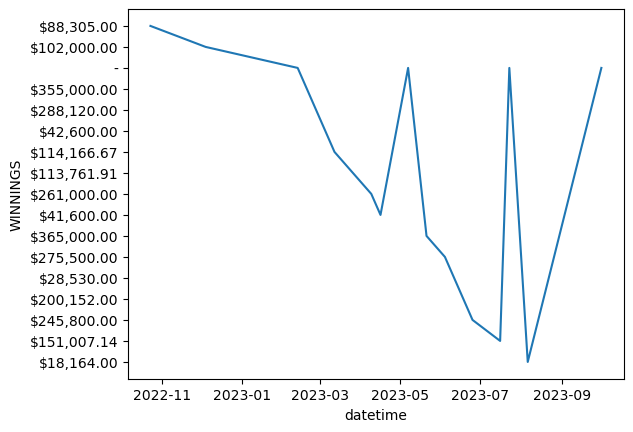

In [89]:
import seaborn as sns
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [90]:
dti = pd.date_range("2022-10-23", periods=52, freq="W")
len(dti)
dti

DatetimeIndex(['2022-10-23', '2022-10-30', '2022-11-06', '2022-11-13',
               '2022-11-20', '2022-11-27', '2022-12-04', '2022-12-11',
               '2022-12-18', '2022-12-25', '2023-01-01', '2023-01-08',
               '2023-01-15', '2023-01-22', '2023-01-29', '2023-02-05',
               '2023-02-12', '2023-02-19', '2023-02-26', '2023-03-05',
               '2023-03-12', '2023-03-19', '2023-03-26', '2023-04-02',
               '2023-04-09', '2023-04-16', '2023-04-23', '2023-04-30',
               '2023-05-07', '2023-05-14', '2023-05-21', '2023-05-28',
               '2023-06-04', '2023-06-11', '2023-06-18', '2023-06-25',
               '2023-07-02', '2023-07-09', '2023-07-16', '2023-07-23',
               '2023-07-30', '2023-08-06', '2023-08-13', '2023-08-20',
               '2023-08-27', '2023-09-03', '2023-09-10', '2023-09-17',
               '2023-09-24', '2023-10-01', '2023-10-08', '2023-10-15'],
              dtype='datetime64[ns]', freq='W-SUN')

In [91]:
winnings = dataframe2['WINNINGS']
winnings

0      $88,305.00
1     $102,000.00
2               -
3     $355,000.00
4     $288,120.00
5      $42,600.00
6     $114,166.67
7     $113,761.91
8     $261,000.00
9      $41,600.00
10              -
11    $365,000.00
12    $275,500.00
13     $28,530.00
14    $200,152.00
15    $245,800.00
16    $151,007.14
17              -
18     $18,164.00
19              -
Name: WINNINGS, dtype: object

In [92]:
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\$':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\,':''}, regex = True)
dataframe2['WINNINGS'] = dataframe2['WINNINGS'].replace({r'\-':'0'}, regex = True)
winnings = dataframe2['WINNINGS']
winnings

0      88305.00
1     102000.00
2             0
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10            0
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17            0
18     18164.00
19            0
Name: WINNINGS, dtype: object

In [93]:
dataframe2['WINNINGS'] = pd.to_numeric(dataframe2['WINNINGS'])
dataframe2['WINNINGS']

0      88305.00
1     102000.00
2          0.00
3     355000.00
4     288120.00
5      42600.00
6     114166.67
7     113761.91
8     261000.00
9      41600.00
10         0.00
11    365000.00
12    275500.00
13     28530.00
14    200152.00
15    245800.00
16    151007.14
17         0.00
18     18164.00
19         0.00
Name: WINNINGS, dtype: float64

<AxesSubplot:xlabel='datetime', ylabel='WINNINGS'>

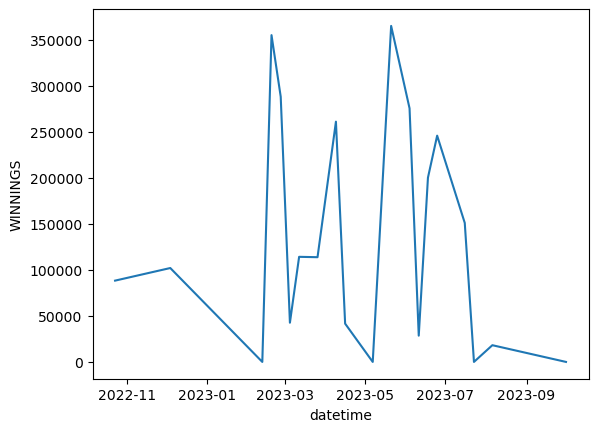

In [94]:
sns.lineplot(data=dataframe2, x="datetime", y="WINNINGS")

In [95]:
#sns.pairplot(data=dataframe2)

In [96]:
mean = dataframe2.WINNINGS.mean()
mean

134535.336

In [97]:
sigma = dataframe2.WINNINGS.std()
sigma

124907.89379401015

In [98]:
rng = np.random.default_rng() 
d = rng.poisson(mean, len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,134163
2022-10-30,134668
2022-11-06,134664
2022-11-13,134640
2022-11-20,134011


In [99]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,134163
2022-10-30,134668
2022-11-06,134664
2022-11-13,134640
2022-11-20,134011


<AxesSubplot:ylabel='WINNINGS'>

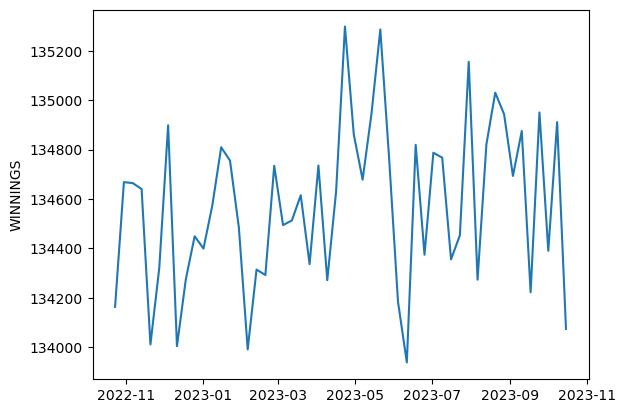

In [100]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

<AxesSubplot:>

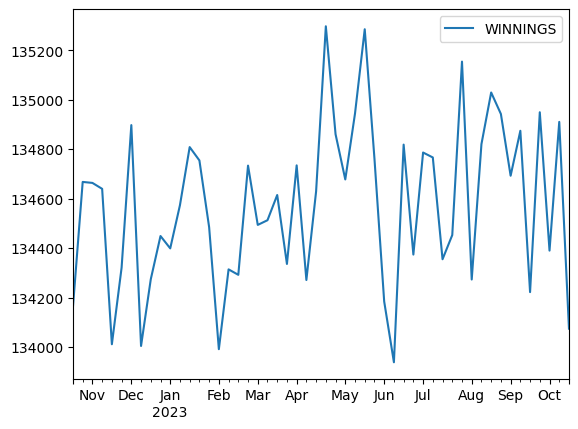

In [101]:
df.plot(y="WINNINGS")

In [102]:
d = rng.normal(mean,sigma,len(dti))
df = pd.DataFrame(data=d, index = dti)
df.head()

,0
2022-10-23,222657.208193
2022-10-30,97484.302741
2022-11-06,36739.805467
2022-11-13,320289.455840
2022-11-20,117851.693441


In [103]:
df.columns =['WINNINGS']
df.head()

,WINNINGS
2022-10-23,222657.208193
2022-10-30,97484.302741
2022-11-06,36739.805467
2022-11-13,320289.455840
2022-11-20,117851.693441


<AxesSubplot:>

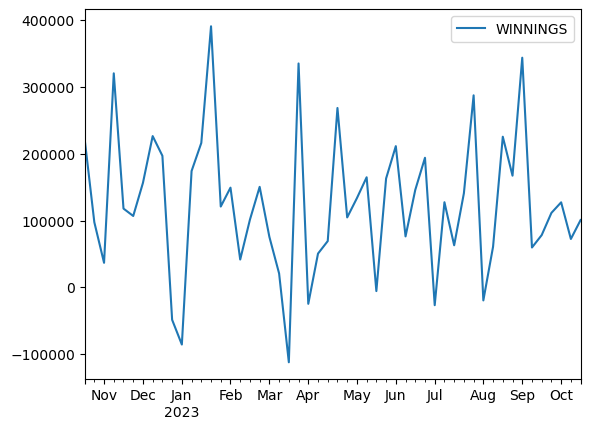

In [104]:
df.plot(y="WINNINGS")

<AxesSubplot:ylabel='WINNINGS'>

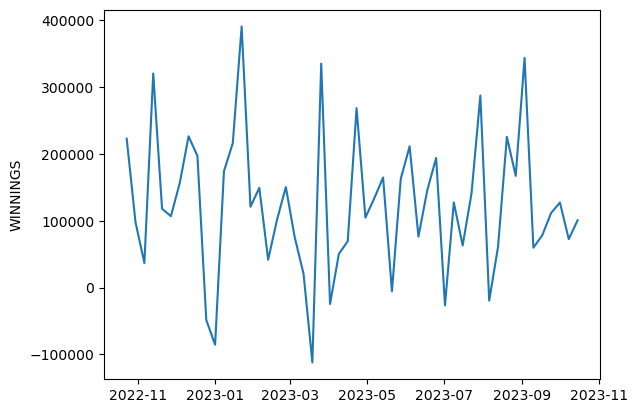

In [105]:
sns.lineplot(data=df, x=df.index, y="WINNINGS")

In [106]:
#sns.pairplot(data=df)

In [107]:
def my_gauss(x, sigma=sigma, h=450000, mean=mean):
    from math import exp, pow
    variance = pow(sigma, 2)
    return h * exp(-pow(x-mean, 2)/(2*variance))

In [108]:
x=df.WINNINGS
yg = [my_gauss(xi) for xi in x]
yg

[350859.58876541373,
 430631.9767166065,
 331208.85468505527,
 148929.28927681784,
 446003.78398934903,
 439051.38378323533,
 443187.8112106426,
 343471.3043503466,
 397340.71869797725,
 153724.8429200663,
 95235.56844556604,
 428012.1710069294,
 363533.4466282278,
 54945.966795955705,
 447339.3340624912,
 446907.33851368545,
 341231.2571061118,
 434348.417404514,
 446384.9977123133,
 402473.5812554127,
 297181.4298405613,
 64026.40532419164,
 124072.06250928757,
 199791.81449326104,
 358904.35631011234,
 392534.17715256504,
 253321.32041164386,
 437296.8338145827,
 449984.04606195126,
 437047.1921937973,
 239848.37163336953,
 438569.5066185984,
 372488.1401775255,
 403582.81571995013,
 448170.9917134975,
 401890.77827397815,
 195595.62826912917,
 449259.3539987706,
 381829.51529412717,
 449430.32301145414,
 212865.8764701342,
 210276.2202483548,
 378144.1629613364,
 345362.46467048465,
 434916.41020536056,
 110770.42784887696,
 375941.6637317782,
 406474.85209202935,
 442377.592846472

(array([ 2.,  3.,  2.,  4.,  1.,  1.,  2.,  6., 11., 20.]),
 array([ 54945.96679596,  94449.77472256, 133953.58264915, 173457.39057575,
        212961.19850235, 252465.00642895, 291968.81435555, 331472.62228215,
        370976.43020875, 410480.23813535, 449984.04606195]),
 <BarContainer object of 10 artists>)

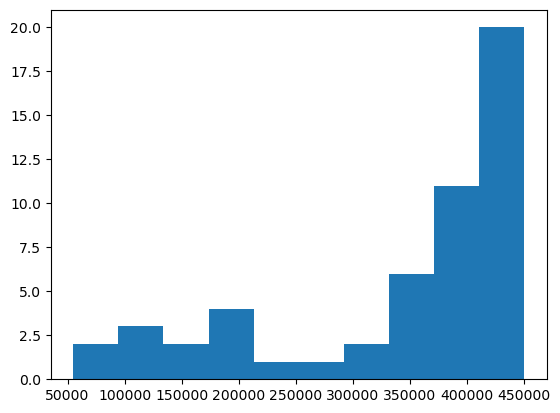

In [109]:
plt.hist(yg)

In [110]:
# Range of x values for plotting.
x = np.linspace(250, 350, 189)
x

array([250.        , 250.53191489, 251.06382979, 251.59574468,
       252.12765957, 252.65957447, 253.19148936, 253.72340426,
       254.25531915, 254.78723404, 255.31914894, 255.85106383,
       256.38297872, 256.91489362, 257.44680851, 257.9787234 ,
       258.5106383 , 259.04255319, 259.57446809, 260.10638298,
       260.63829787, 261.17021277, 261.70212766, 262.23404255,
       262.76595745, 263.29787234, 263.82978723, 264.36170213,
       264.89361702, 265.42553191, 265.95744681, 266.4893617 ,
       267.0212766 , 267.55319149, 268.08510638, 268.61702128,
       269.14893617, 269.68085106, 270.21276596, 270.74468085,
       271.27659574, 271.80851064, 272.34042553, 272.87234043,
       273.40425532, 273.93617021, 274.46808511, 275.        ,
       275.53191489, 276.06382979, 276.59574468, 277.12765957,
       277.65957447, 278.19148936, 278.72340426, 279.25531915,
       279.78723404, 280.31914894, 280.85106383, 281.38297872,
       281.91489362, 282.44680851, 282.9787234 , 283.51

In [111]:
#f(x)

In [112]:
# Create empty plot.
#fig, ax = plt.subplots(figsize=(12, 4))

# Plot f(x).
#ax.plot(x, f(x));

In [113]:
rng.integers(10,25)

15

In [114]:
rng.integers(100, size=10)

array([32,  6, 33, 26, 21, 80, 26, 74, 37, 32], dtype=int64)

In [115]:
rng.integers(50,100, size=10)

array([55, 66, 74, 71, 55, 91, 67, 65, 80, 93], dtype=int64)

In [116]:
rng.integers(100, size=(2,4))

array([[72, 53, 50, 71],
       [14, 47, 35,  5]], dtype=int64)

In [117]:
rng.random()

0.738553760626386

In [118]:
rng.random(5)

array([0.9691943 , 0.07845262, 0.08134307, 0.26082848, 0.65124171])

In [119]:
rng.random((5,4))

array([[0.98679122, 0.81182772, 0.16787868, 0.40445069],
       [0.52445278, 0.67596045, 0.73557259, 0.47473767],
       [0.47513122, 0.45282951, 0.57325126, 0.39681205],
       [0.64920168, 0.79033227, 0.81017444, 0.25580175],
       [0.51040132, 0.83802429, 0.16077018, 0.95460652]])

In [120]:
x = rng.random(1000000)
x

array([0.31281289, 0.90521571, 0.74488972, ..., 0.93402101, 0.98099401,
       0.72728943])

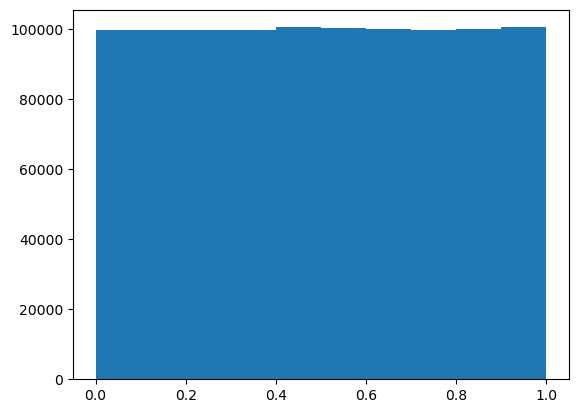

In [121]:
import matplotlib.pyplot as plt
plt.hist(x)
plt.show()

In [122]:
rng = np.random.default_rng(seed=43)
x = rng.random()
print(x)

0.6522992627009107


In [123]:
rng = np.random.default_rng(seed=44)
x = rng.integers(10)
print(x)

6


In [124]:
rng = np.random.default_rng(seed=43)
x = rng.random((2,4))
print(x)

[[0.65229926 0.04377532 0.02002959 0.83921258]
 [0.58714305 0.22470523 0.75179227 0.2636922 ]]


In [125]:
rng = np.random.default_rng(seed=43)
x = rng.integers(50,100,size=(3,3))
print(x)

[[75 82 70]
 [52 78 51]
 [63 91 73]]
